In [3]:
import pandas as pd
import sys
import os
import warnings

import utils as u
import joblib

warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m'
print(f"{color}Version pandas: {pd.__version__}")

Version pandas: 2.2.3


## Loading meme data

In [4]:
gaming = pd.read_csv('../data_28/processed/gaming.csv')
ai = pd.read_csv('../data_28/processed/ai.csv')
meme = pd.read_csv('../data_28/processed/meme.csv')
rwa = pd.read_csv('../data_28/processed/rwa.csv')

gaming.shape, ai.shape, meme.shape, rwa.shape

((125654, 10), (113423, 10), (33039, 10), (52339, 10))

## Preprocessing data

In [5]:
days_to_predict = 7

In [6]:
class category_data:
    def __init__(self, train_data, series_dict, exog_dict, future_exog_dict, series_scaler, exog_scaler):
        self.train_data = train_data
        self.series_dict = series_dict
        self.exog_dict = exog_dict
        self.future_exog_dict = future_exog_dict
        self.series_scaler = series_scaler
        self.exog_scaler = exog_scaler
        self.forecaster = None
        self.predictions = None
        self.og_train = None
        self.og_pred = None
        self.error_df = None
        self.close_df = None

In [7]:
def generate_data_object(data: pd.DataFrame, days: int):
    train_data, series_dict, exog_dict, future_exog_dict, series_scaler, exog_scaler = u.preprocess_future(data, days_to_predict=days)
    data_obj = category_data(train_data, series_dict, exog_dict, future_exog_dict, series_scaler, exog_scaler)
    return data_obj

In [8]:
gaming_obj = generate_data_object(gaming, days_to_predict)
ai_obj = generate_data_object(ai, days_to_predict)
meme_obj = generate_data_object(meme, days_to_predict)
rwa_obj = generate_data_object(rwa, days_to_predict)

In [9]:
print(gaming_obj.train_data['id'].nunique())
print(ai_obj.train_data['id'].nunique())
print(meme_obj.train_data['id'].nunique())
print(rwa_obj.train_data['id'].nunique())

56
31
18
16


In [8]:
# gaming_obj.forecaster = u.train_best_forecaster(gaming_obj.series_dict, gaming_obj.exog_dict, gaming_obj.future_exog_dict, gaming_obj.test_data, future_days=days_to_predict)
# ai_obj.forecaster = u.train_best_forecaster(ai_obj.series_dict, ai_obj.exog_dict, ai_obj.future_exog_dict, ai_obj.test_data, future_days=days_to_predict)
# meme_obj.forecaster = u.train_best_forecaster(meme_obj.series_dict, meme_obj.exog_dict, meme_obj.future_exog_dict, meme_obj.test_data, future_days=days_to_predict)
# rwa_obj.forecaster = u.train_best_forecaster(rwa_obj.series_dict, rwa_obj.exog_dict, rwa_obj.future_exog_dict, rwa_obj.test_data, future_days=days_to_predict)

In [10]:
gaming_obj.forecaster = u.train_forecaster(gaming_obj.series_dict, gaming_obj.exog_dict)
ai_obj.forecaster = u.train_forecaster(ai_obj.series_dict, ai_obj.exog_dict)
meme_obj.forecaster = u.train_forecaster(meme_obj.series_dict, meme_obj.exog_dict)
rwa_obj.forecaster = u.train_forecaster(rwa_obj.series_dict, rwa_obj.exog_dict)

{'loss_function': 'RMSE', 'silent': True, 'max_depth': 5, 'random_state': 123}
{'loss_function': 'RMSE', 'silent': True, 'max_depth': 5, 'random_state': 123}
{'loss_function': 'RMSE', 'silent': True, 'max_depth': 5, 'random_state': 123}
{'loss_function': 'RMSE', 'silent': True, 'max_depth': 5, 'random_state': 123}


In [11]:
gaming_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=gaming_obj.forecaster, future_exog_dict=gaming_obj.future_exog_dict)
ai_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=ai_obj.forecaster, future_exog_dict=ai_obj.future_exog_dict)
meme_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=meme_obj.forecaster, future_exog_dict=meme_obj.future_exog_dict)
rwa_obj.predictions = u.predict_X_days(days_to_predict=days_to_predict, forecaster=rwa_obj.forecaster, future_exog_dict=rwa_obj.future_exog_dict)

In [12]:
gaming_obj.og_train, gaming_obj.og_pred = u.inverse_scaling_future(train_df=gaming_obj.train_data, pred_df=gaming_obj.predictions, scalers=gaming_obj.series_scaler)
ai_obj.og_train, ai_obj.og_pred = u.inverse_scaling_future(train_df=ai_obj.train_data, pred_df=ai_obj.predictions, scalers=ai_obj.series_scaler)
meme_obj.og_train, meme_obj.og_pred = u.inverse_scaling_future(train_df=meme_obj.train_data, pred_df=meme_obj.predictions, scalers=meme_obj.series_scaler)
rwa_obj.og_train, rwa_obj.og_pred = u.inverse_scaling_future(train_df=rwa_obj.train_data, pred_df=rwa_obj.predictions, scalers=rwa_obj.series_scaler)

In [28]:
meme_obj.og_train[meme_obj.og_train['symbol'] == "DOGE"].tail()

,timestamp,open,high,low,close,volume,name,symbol,id,category,days_until_halving
15573,2024-10-11,0.105968,0.111366,0.105617,0.110740,3.703613e+08,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme,1.444700
15574,2024-10-12,0.110750,0.112247,0.109328,0.111395,2.722651e+08,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme,1.442294
15575,2024-10-13,0.111394,0.112058,0.108697,0.111354,3.045297e+08,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme,1.439888
15576,2024-10-14,0.111357,0.117666,0.109323,0.116647,6.542208e+08,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme,1.437482
15577,2024-10-15,0.116667,0.119080,0.110534,0.115598,7.743685e+08,Dogecoin,DOGE,7d793fa7-5fc6-432a-b26b-d1b10769d42e,meme,1.435076


In [30]:
meme_obj.og_pred["7d793fa7-5fc6-432a-b26b-d1b10769d42e"]

2024-10-16    0.119651
2024-10-17    0.120396
2024-10-18    0.121691
2024-10-19    0.125638
2024-10-20    0.127365
2024-10-21    0.134786
2024-10-22    0.132170
Freq: D, Name: 7d793fa7-5fc6-432a-b26b-d1b10769d42e, dtype: float64

In [ ]:
u.plot_predictions_only(train_data=gaming_obj.og_train, predictions_x_days=gaming_obj.og_pred, last_data_points=60)

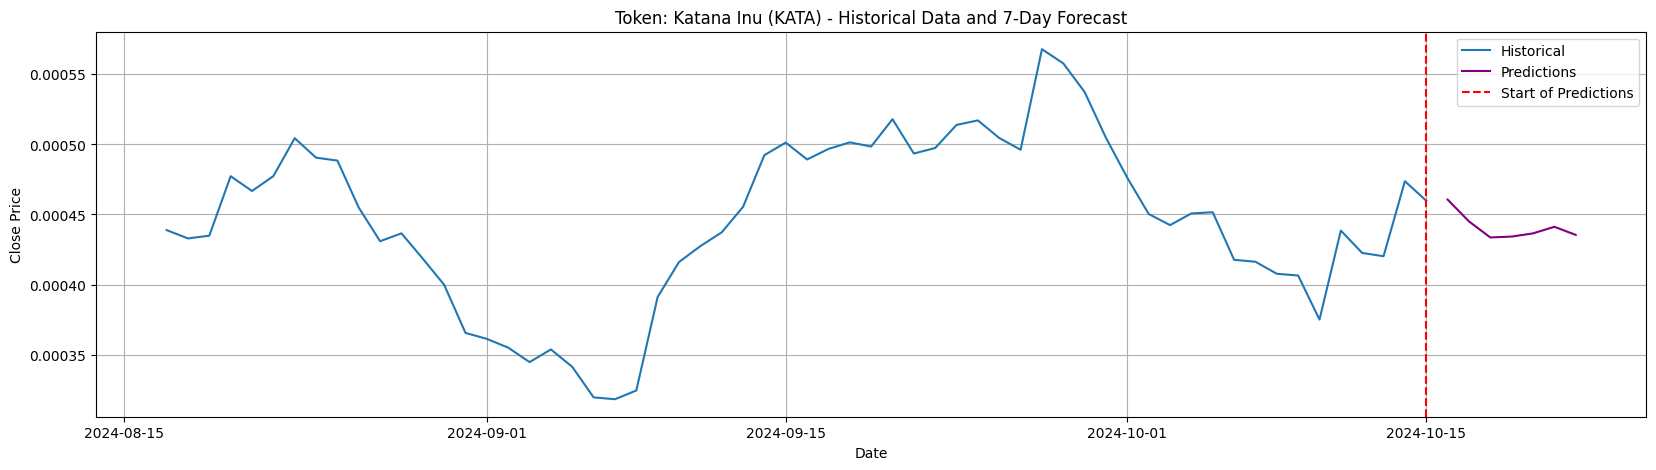

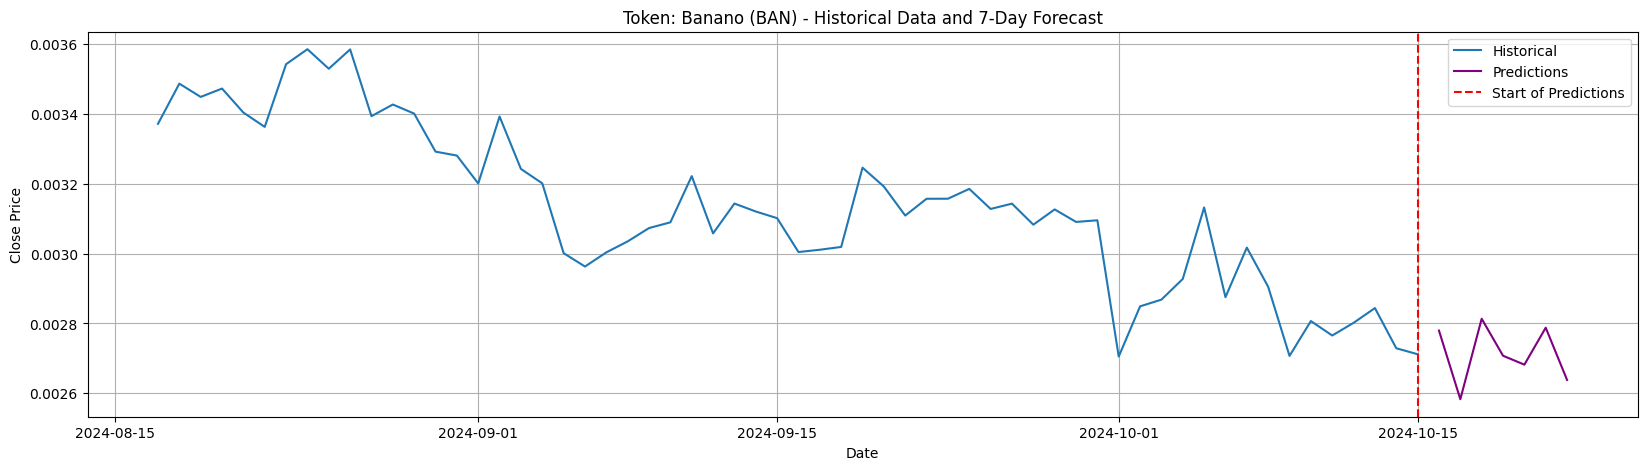

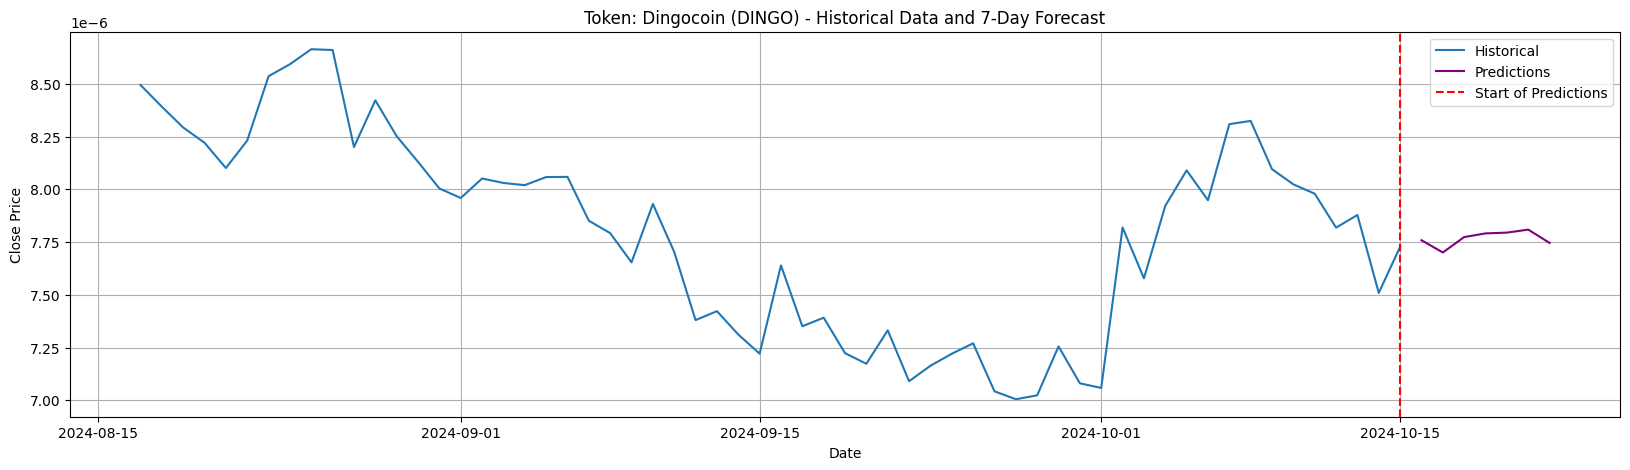

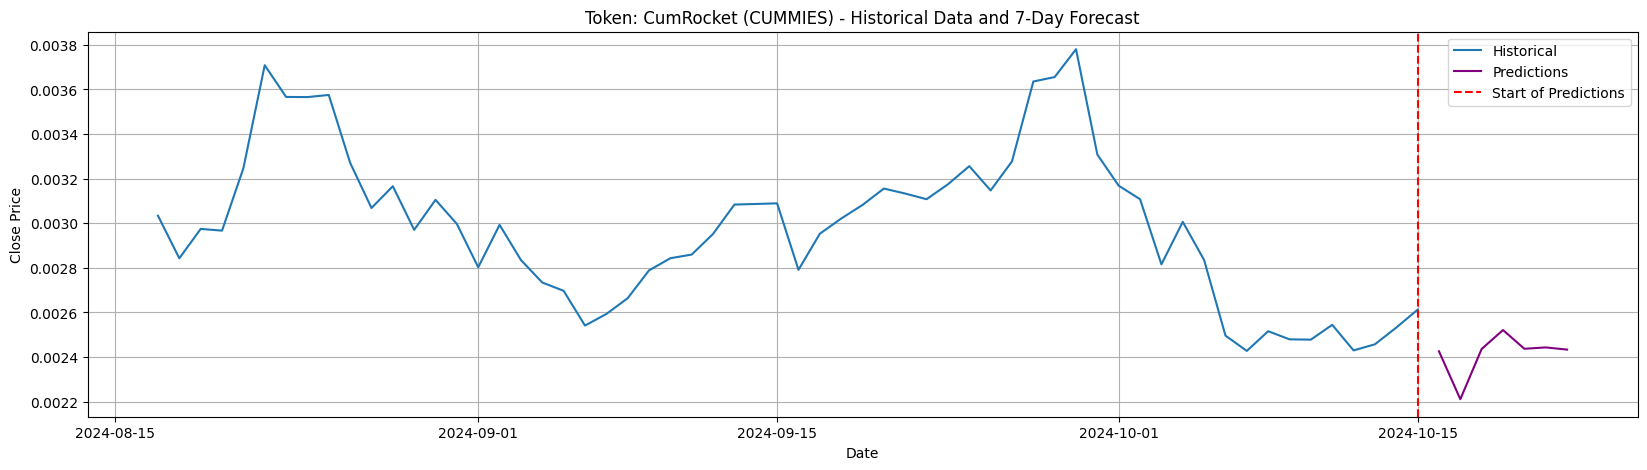

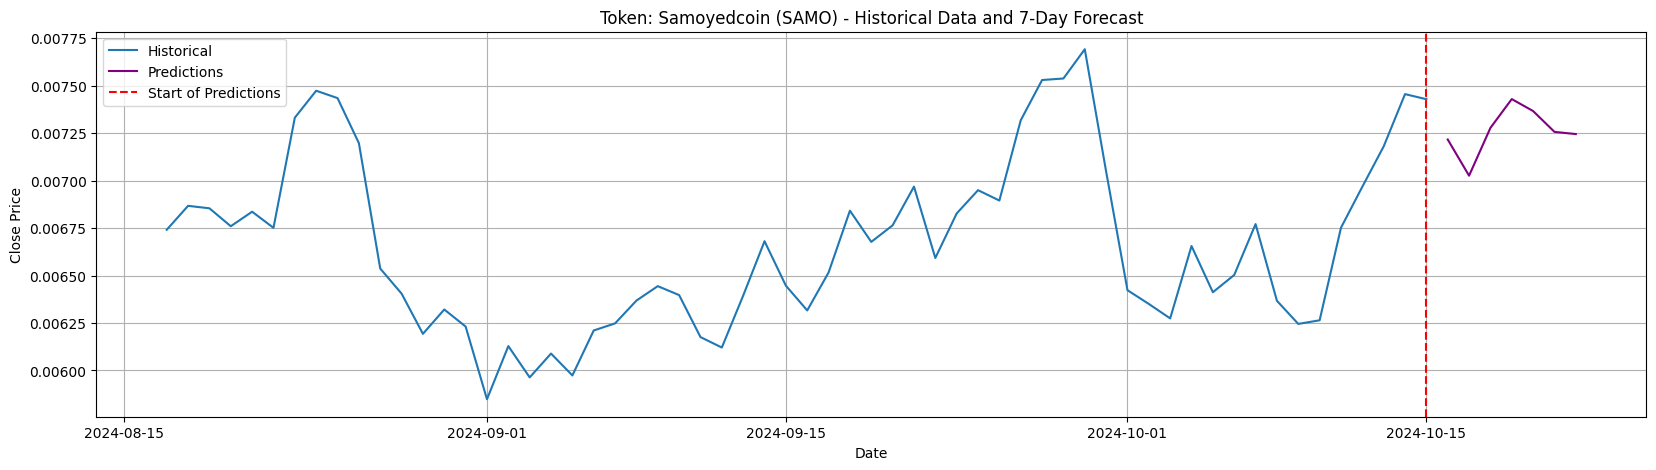

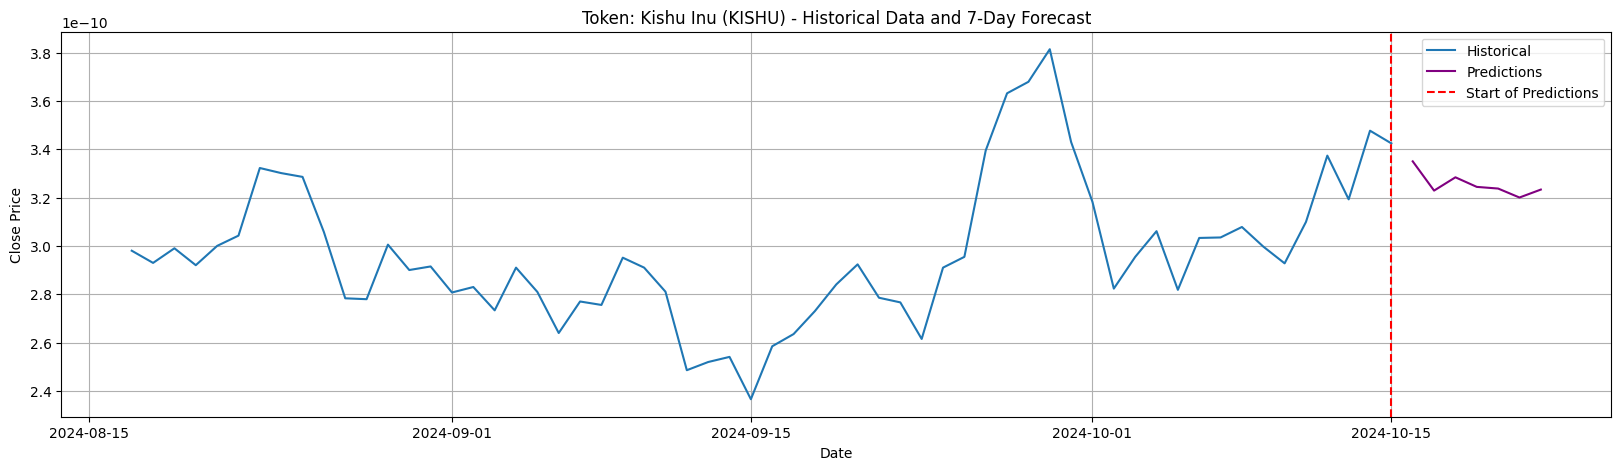

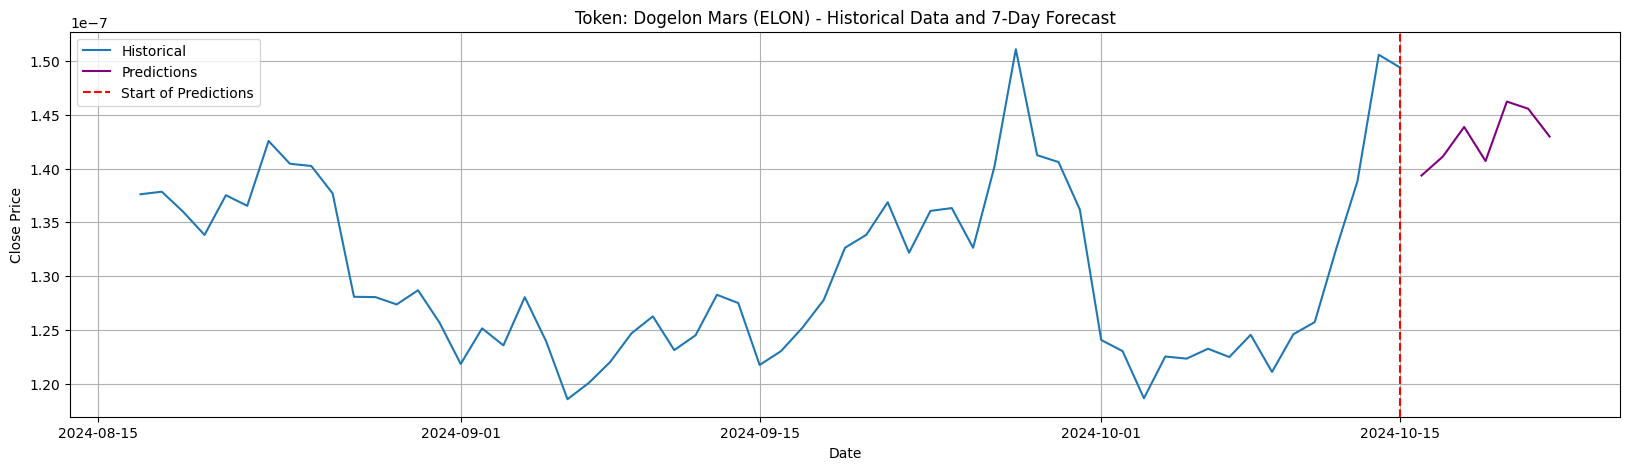

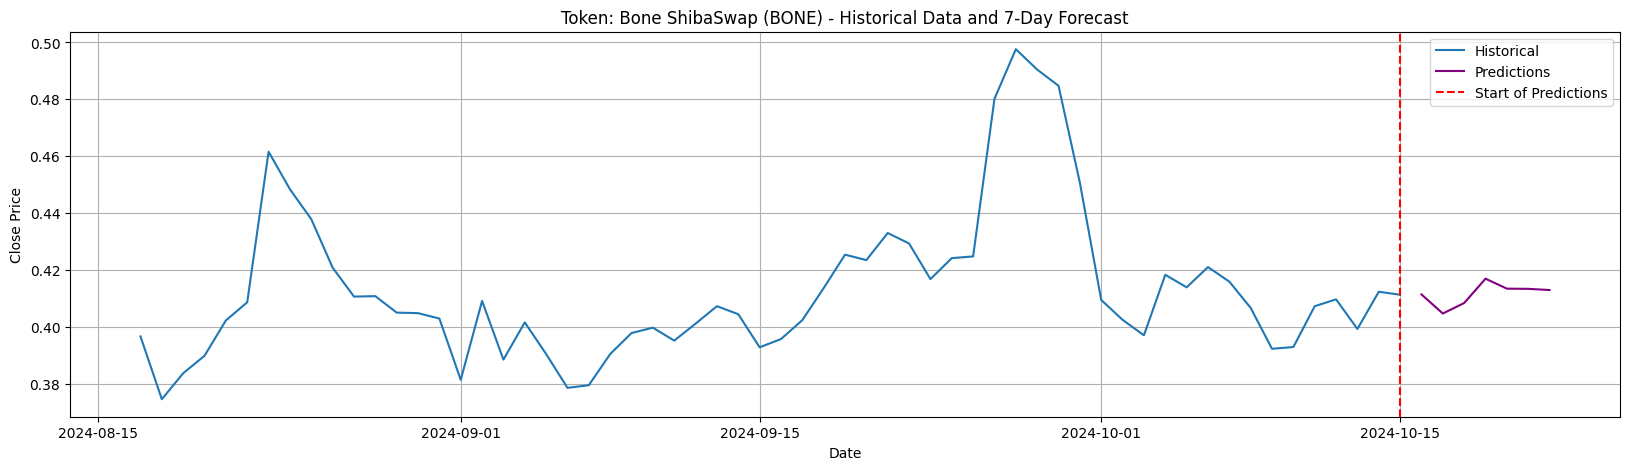

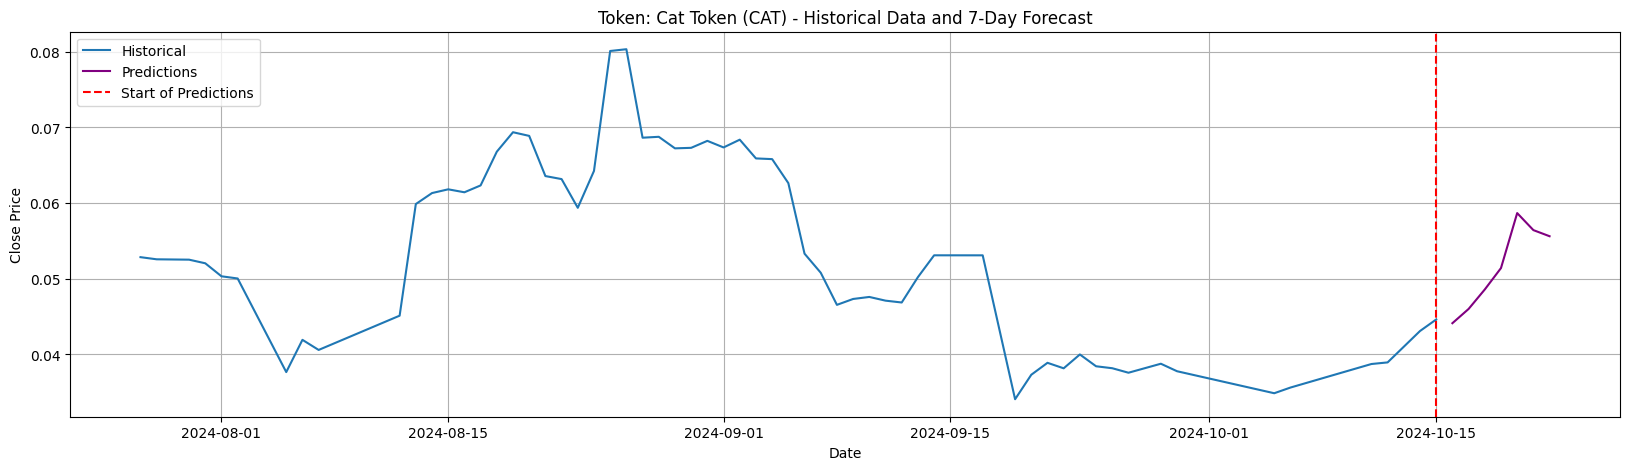

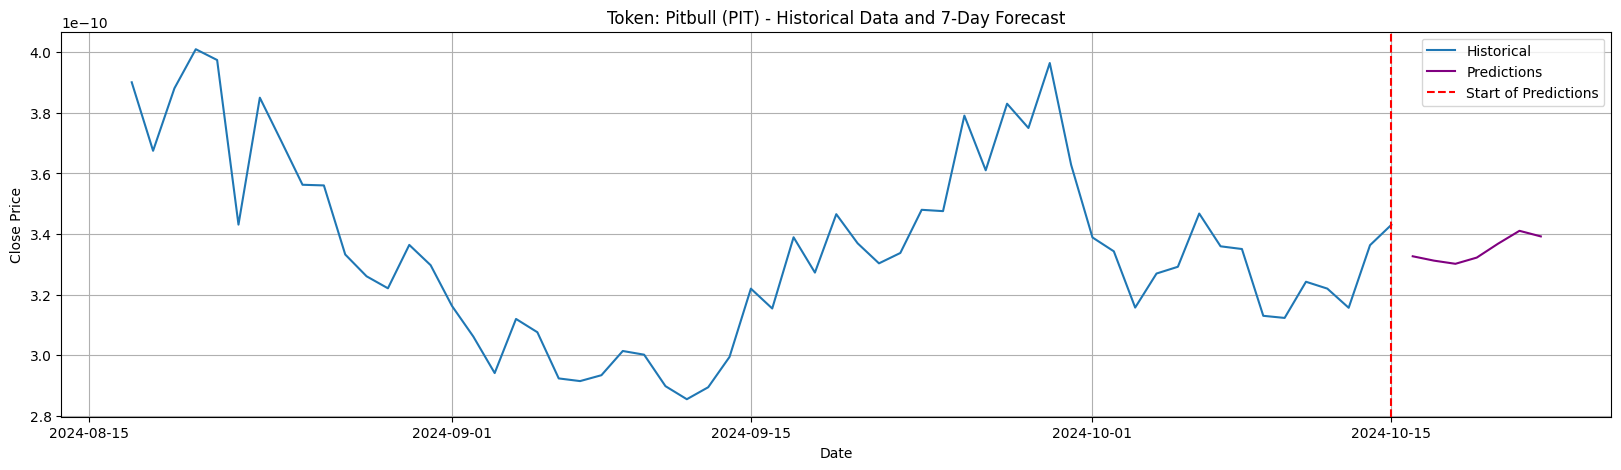

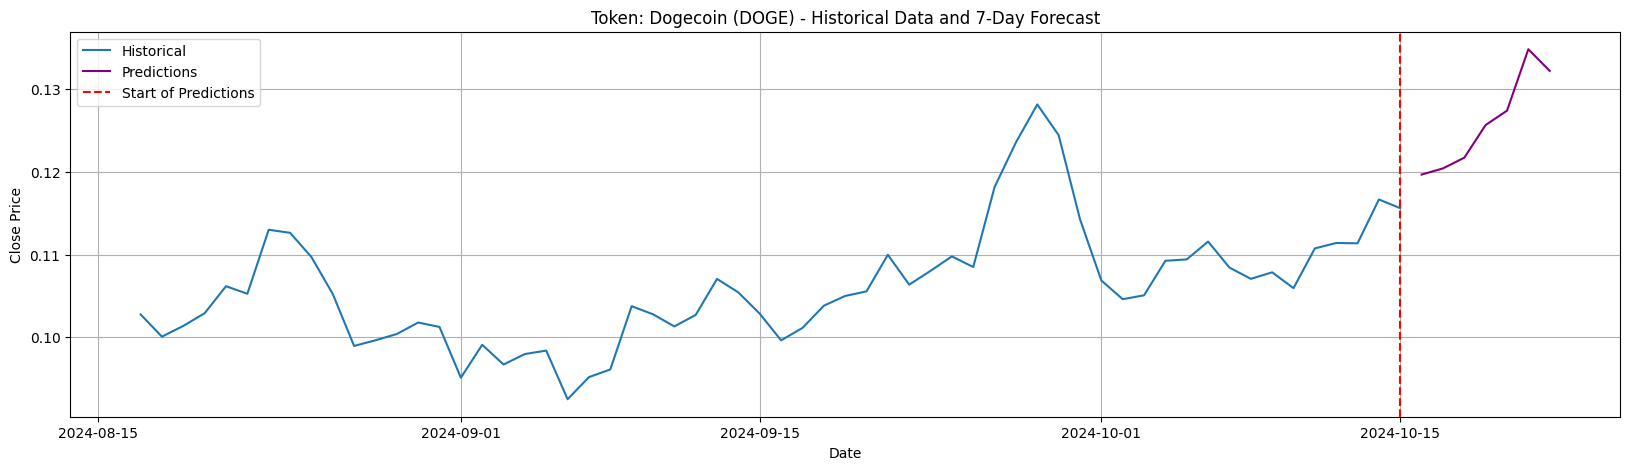

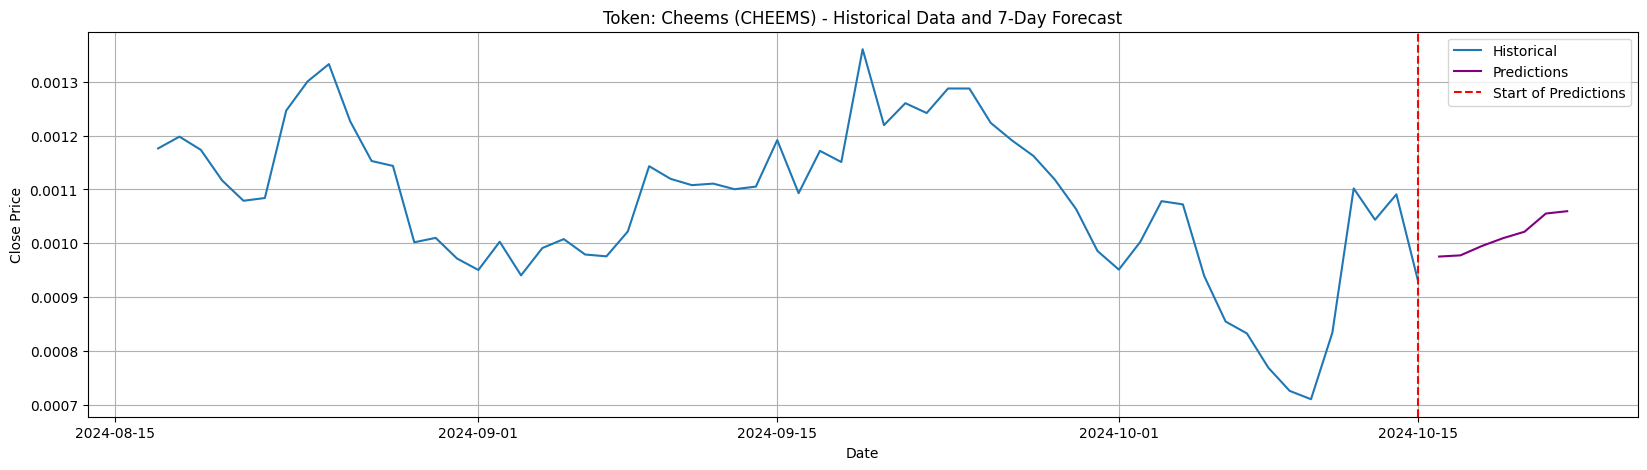

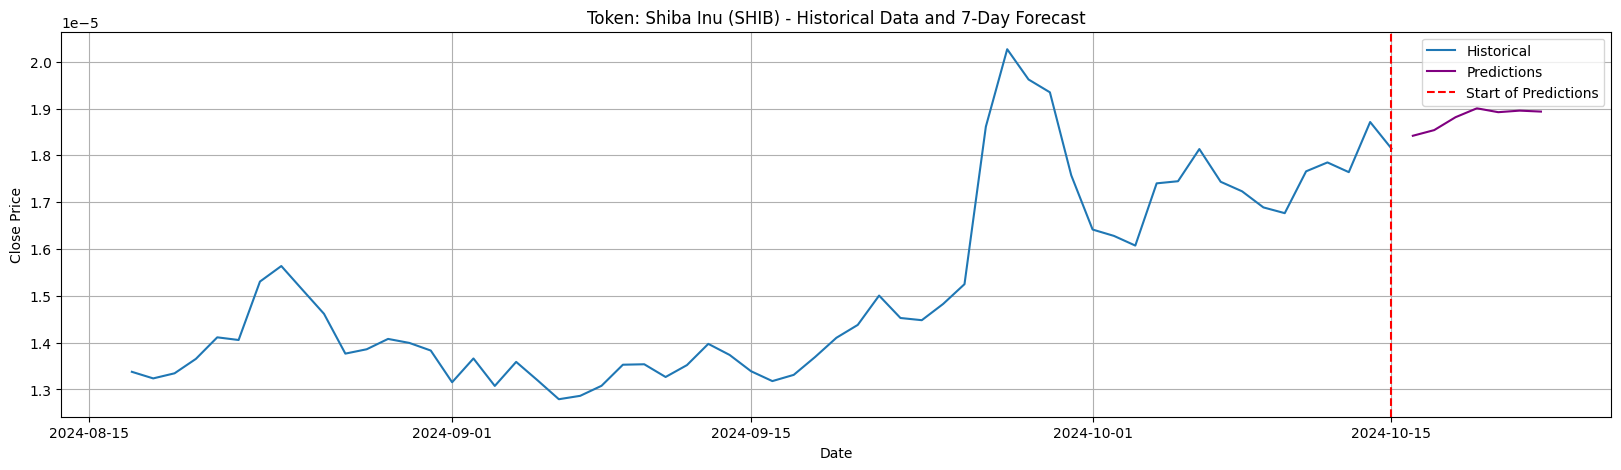

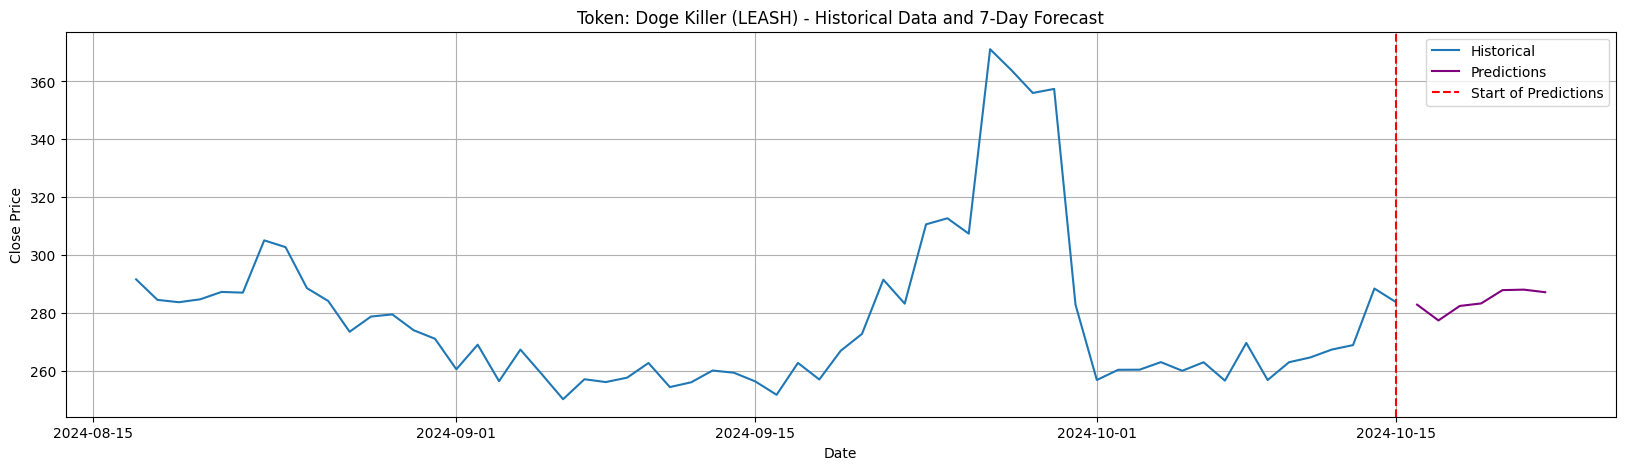

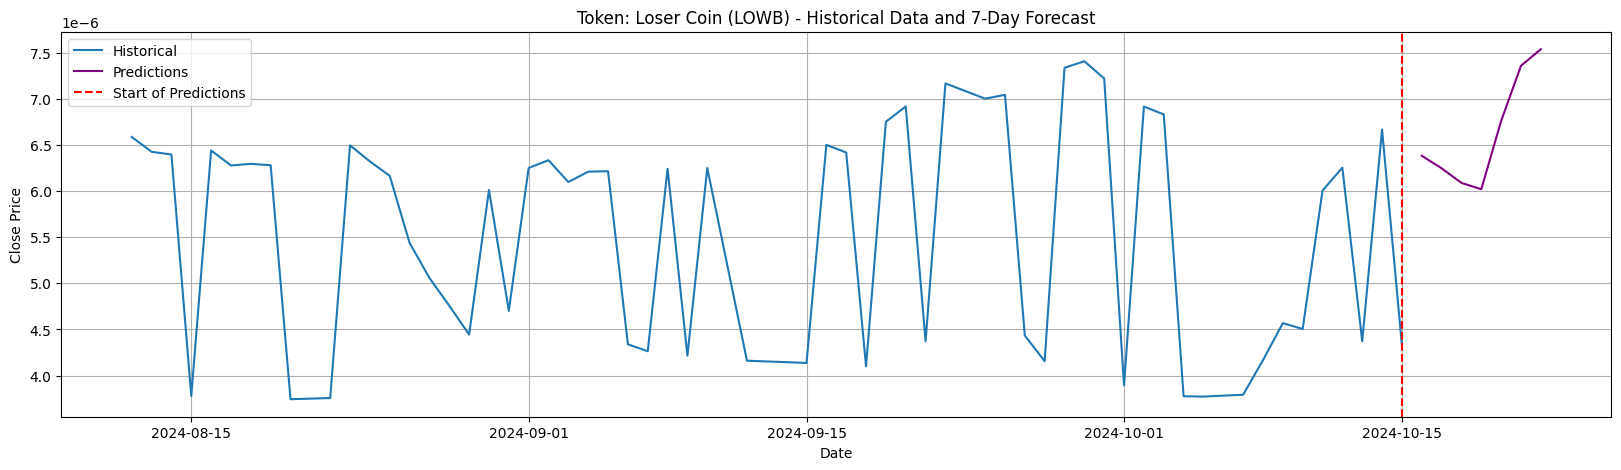

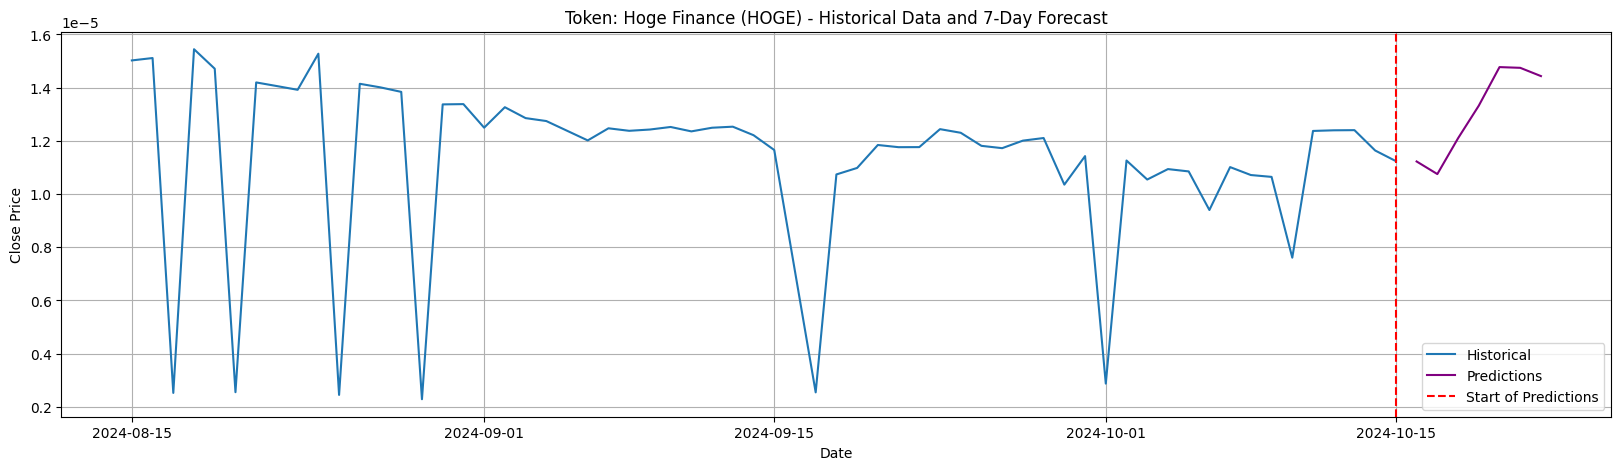

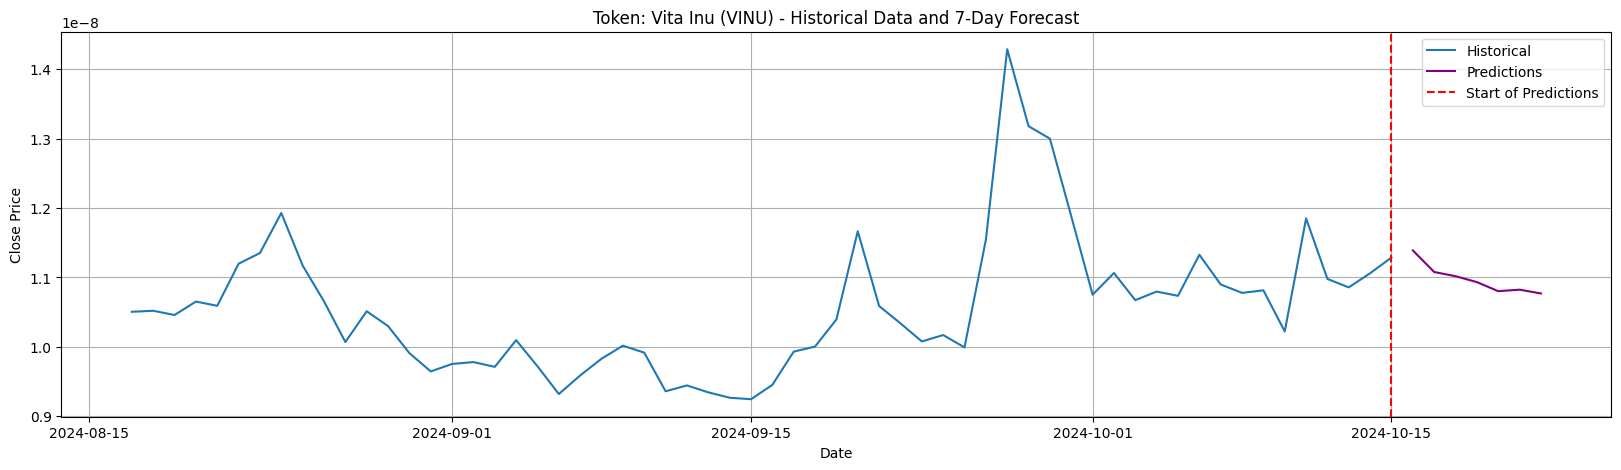

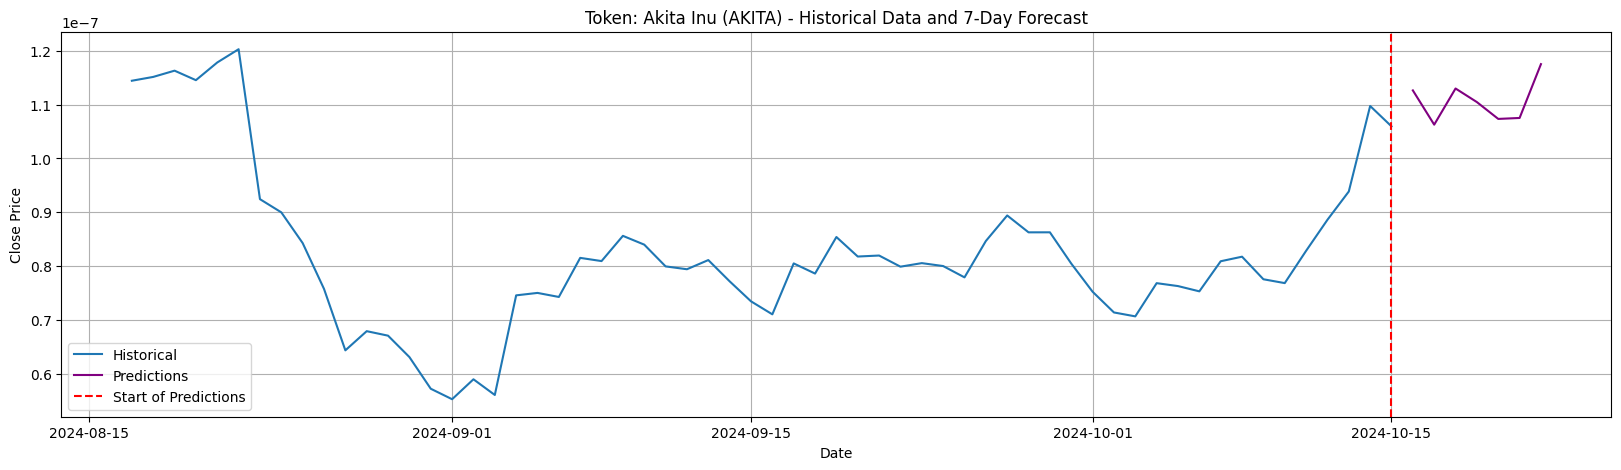

In [25]:
u.plot_predictions_only(train_data=meme_obj.og_train, predictions_x_days=meme_obj.og_pred, last_data_points=60)